<a href="https://colab.research.google.com/github/carolinirufino/Telecom_X_2/blob/main/TelecomX_2_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Carregamento de bibliotecas e base de dados**

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [157]:
df = pd.read_csv('https://raw.githubusercontent.com/carolinirufino/Telecom_X_2/refs/heads/main/TelecomX_Data_Processed.csv')

df.head()

,ID_Cliente,Rotatividade,Sexo_Cliente,Cliente_Idoso,Cliente_Parceiro,Cliente_Dependentes,Tempo_Servico,Servico_Telefone,Multiplas_Linhas,Servico_Internet,...,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Contrato_Conta,Conta_Digital,Metodo_Pagamento,Encargos_Mensais,Encargos_Totais,Contas_Diarias
0,0002-ORFBO,0,feminino,0,1,1,9,1,0.0,dsl,...,0.0,1.0,1.0,0.0,anual,1,cheque enviado,65.6,593.30,2.186667
1,0003-MKNFE,0,masculino,0,0,0,9,1,1.0,dsl,...,0.0,0.0,0.0,1.0,mensal,0,cheque enviado,59.9,542.40,1.996667
2,0004-TLHLJ,1,masculino,0,0,0,4,1,0.0,fibra óptica,...,1.0,0.0,0.0,0.0,mensal,1,cheque eletrônico,73.9,280.85,2.463333
3,0011-IGKFF,1,masculino,1,1,0,13,1,0.0,fibra óptica,...,1.0,0.0,1.0,1.0,mensal,1,cheque eletrônico,98.0,1237.85,3.266667
4,0013-EXCHZ,1,feminino,1,1,0,3,1,0.0,fibra óptica,...,0.0,1.0,1.0,0.0,mensal,1,cheque enviado,83.9,267.40,2.796667


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Cliente            7267 non-null   object 
 1   Rotatividade          7267 non-null   int64  
 2   Sexo_Cliente          7267 non-null   object 
 3   Cliente_Idoso         7267 non-null   int64  
 4   Cliente_Parceiro      7267 non-null   int64  
 5   Cliente_Dependentes   7267 non-null   int64  
 6   Tempo_Servico         7267 non-null   int64  
 7   Servico_Telefone      7267 non-null   int64  
 8   Multiplas_Linhas      7267 non-null   float64
 9   Servico_Internet      7267 non-null   object 
 10  Seguranca_Online      7267 non-null   float64
 11  Backup_Online         7267 non-null   float64
 12  Protecao_Dispositivo  7267 non-null   float64
 13  Suporte_Tecnico       7267 non-null   float64
 14  Streaming_TV          7267 non-null   float64
 15  Streaming_Filmes     

**Limpeza Inicial dos Dados**

In [159]:
# Remover colunas inúteis:
df.drop(columns=['ID_Cliente'], inplace=True)

In [160]:
# Verificar tipos de dados (object, int, float):
df.dtypes

,0
Rotatividade,int64
Sexo_Cliente,object
Cliente_Idoso,int64
Cliente_Parceiro,int64
Cliente_Dependentes,int64
Tempo_Servico,int64
Servico_Telefone,int64
Multiplas_Linhas,float64
Servico_Internet,object
Seguranca_Online,float64


In [161]:
# Verificar valores únicos nas colunas categóricas:
variaveis_categoricas = ['Sexo_Cliente', 'Servico_Internet', 'Contrato_Conta', 'Metodo_Pagamento']

for col in variaveis_categoricas:
    print(f"{col}:\n{df[col].value_counts()}\n")

Sexo_Cliente:
Sexo_Cliente
masculino    3675
feminino     3592
Name: count, dtype: int64

Servico_Internet:
Servico_Internet
fibra óptica    3198
dsl             2488
nenhum          1581
Name: count, dtype: int64

Contrato_Conta:
Contrato_Conta
mensal    4005
bienal    1743
anual     1519
Name: count, dtype: int64

Metodo_Pagamento:
Metodo_Pagamento
cheque eletrônico         2445
cheque enviado            1665
transferência bancária    1589
cartão de crédito         1568
Name: count, dtype: int64



In [162]:
df.columns

Index(['Rotatividade', 'Sexo_Cliente', 'Cliente_Idoso', 'Cliente_Parceiro',
       'Cliente_Dependentes', 'Tempo_Servico', 'Servico_Telefone',
       'Multiplas_Linhas', 'Servico_Internet', 'Seguranca_Online',
       'Backup_Online', 'Protecao_Dispositivo', 'Suporte_Tecnico',
       'Streaming_TV', 'Streaming_Filmes', 'Contrato_Conta', 'Conta_Digital',
       'Metodo_Pagamento', 'Encargos_Mensais', 'Encargos_Totais',
       'Contas_Diarias'],
      dtype='object')

In [163]:
df.head()

,Rotatividade,Sexo_Cliente,Cliente_Idoso,Cliente_Parceiro,Cliente_Dependentes,Tempo_Servico,Servico_Telefone,Multiplas_Linhas,Servico_Internet,Seguranca_Online,...,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Contrato_Conta,Conta_Digital,Metodo_Pagamento,Encargos_Mensais,Encargos_Totais,Contas_Diarias
0,0,feminino,0,1,1,9,1,0.0,dsl,0.0,...,0.0,1.0,1.0,0.0,anual,1,cheque enviado,65.6,593.30,2.186667
1,0,masculino,0,0,0,9,1,1.0,dsl,0.0,...,0.0,0.0,0.0,1.0,mensal,0,cheque enviado,59.9,542.40,1.996667
2,1,masculino,0,0,0,4,1,0.0,fibra óptica,0.0,...,1.0,0.0,0.0,0.0,mensal,1,cheque eletrônico,73.9,280.85,2.463333
3,1,masculino,1,1,0,13,1,0.0,fibra óptica,0.0,...,1.0,0.0,1.0,1.0,mensal,1,cheque eletrônico,98.0,1237.85,3.266667
4,1,feminino,1,1,0,3,1,0.0,fibra óptica,0.0,...,0.0,1.0,1.0,0.0,mensal,1,cheque enviado,83.9,267.40,2.796667


**Encoding das variáveis categóricas**

In [164]:
variaveis_categoricas = [
    'Sexo_Cliente',
    'Servico_Internet',
    'Contrato_Conta',
    'Metodo_Pagamento'
]

In [165]:
df = pd.get_dummies(df, columns=variaveis_categoricas, drop_first=True)
df = df.astype(int)
df

,Rotatividade,Cliente_Idoso,Cliente_Parceiro,Cliente_Dependentes,Tempo_Servico,Servico_Telefone,Multiplas_Linhas,Seguranca_Online,Backup_Online,Protecao_Dispositivo,...,Encargos_Totais,Contas_Diarias,Sexo_Cliente_masculino,Servico_Internet_fibra óptica,Servico_Internet_nenhum,Contrato_Conta_bienal,Contrato_Conta_mensal,Metodo_Pagamento_cheque eletrônico,Metodo_Pagamento_cheque enviado,Metodo_Pagamento_transferência bancária
0,0,0,1,1,9,1,0,0,1,0,...,593,2,0,0,0,0,0,0,1,0
1,0,0,0,0,9,1,1,0,0,0,...,542,1,1,0,0,0,1,0,1,0
2,1,0,0,0,4,1,0,0,0,1,...,280,2,1,1,0,0,1,1,0,0
3,1,1,1,0,13,1,0,0,1,1,...,1237,3,1,1,0,0,1,1,0,0
4,1,1,1,0,3,1,0,0,0,0,...,267,2,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0,0,0,0,13,1,0,1,0,0,...,742,1,0,0,0,0,0,0,1,0
7263,1,0,1,0,22,1,1,0,0,0,...,1873,2,1,1,0,0,1,1,0,0
7264,0,0,0,0,2,1,0,0,1,0,...,92,1,1,0,0,0,1,0,1,0
7265,0,0,1,1,67,1,0,1,0,1,...,4627,2,1,0,0,1,0,0,1,0


**Verificação da Proporção de Evasão**

In [166]:
# Contagem das classes
contagem = df['Rotatividade'].value_counts()

ativos = contagem.get(0, 0)
evadidos = contagem.get(1, 0)

proporcao = evadidos / ativos if ativos != 0 else None

print(f"Clientes ativos: {ativos}")
print(f"Clientes evadidos: {evadidos}")
print(f"Proporção (evadidos / ativos): {proporcao:.4f}")

# Avaliação simples do desequilíbrio
if proporcao is not None:
    if proporcao < 0.2:
        print("⚠️ Atenção: Classes desbalanceadas — poucos evadidos comparado com ativos.")
    else:
        print("✔️ Classes relativamente balanceadas.")
else:
    print("Erro: Não foi possível calcular a proporção (divisão por zero).")


Clientes ativos: 5398
Clientes evadidos: 1869
Proporção (evadidos / ativos): 0.3462
✔️ Classes relativamente balanceadas.


**Análise de Correlação**

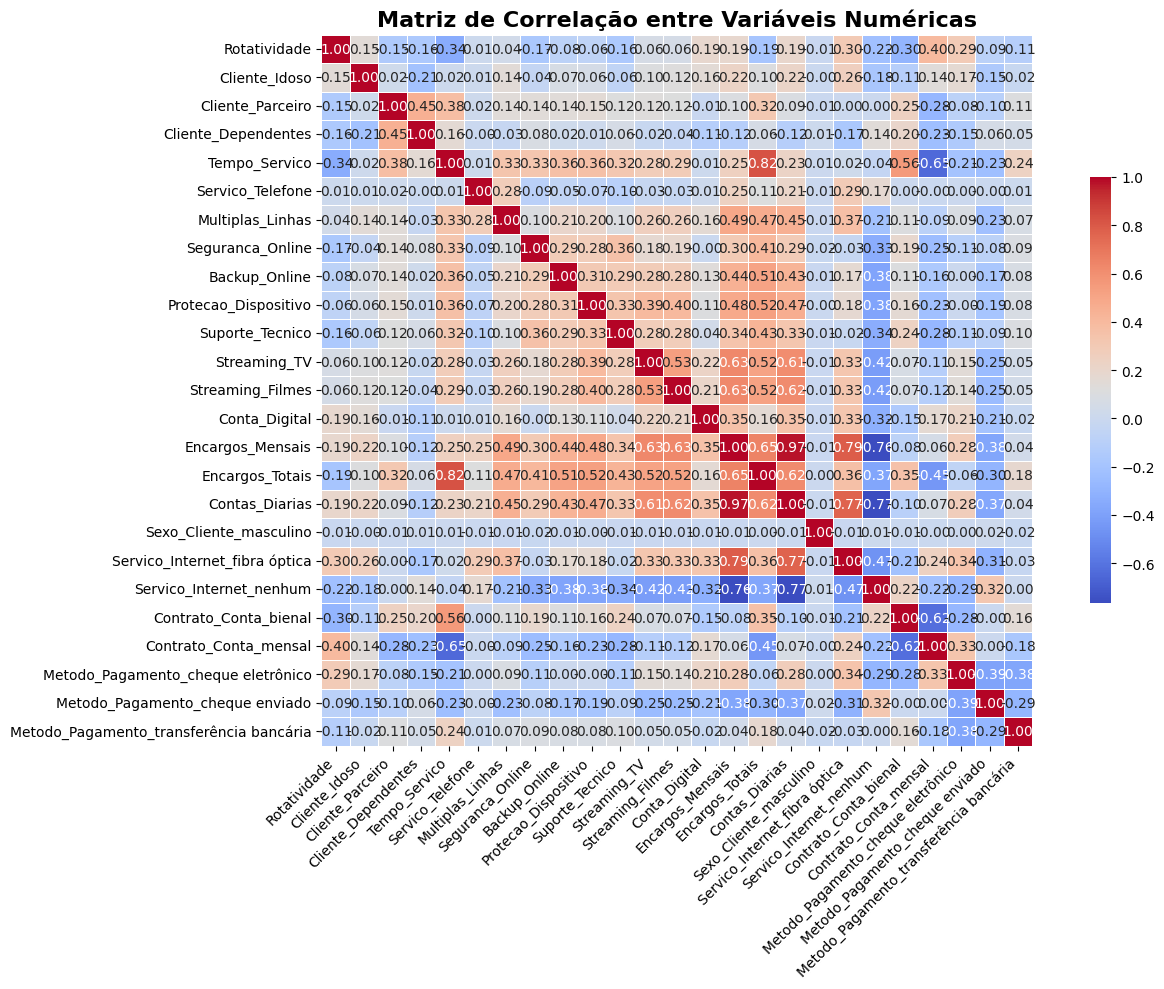

In [167]:
df_corr = df.corr(numeric_only=True)

plt.figure(figsize=(14, 10))

sns.heatmap(df_corr, cmap='coolwarm', annot=True, fmt='.2f', square=True,
            linewidths=.5, cbar_kws={"shrink": .6})

plt.title('Matriz de Correlação entre Variáveis Numéricas', fontsize=16, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [168]:
# Correlação de cada variável com 'Rotatividade', ordenadas:
correlacoes_com_churn = df_corr['Rotatividade'].drop('Rotatividade').sort_values(key=abs, ascending=False)

print("🔍 Variáveis mais correlacionadas com a evasão:")
print(correlacoes_com_churn)

🔍 Variáveis mais correlacionadas com a evasão:
Contrato_Conta_mensal                      0.395584
Tempo_Servico                             -0.344079
Servico_Internet_fibra óptica              0.300949
Contrato_Conta_bienal                     -0.295138
Metodo_Pagamento_cheque eletrônico         0.294626
Servico_Internet_nenhum                   -0.224051
Encargos_Totais                           -0.194018
Contas_Diarias                             0.192562
Encargos_Mensais                           0.189907
Conta_Digital                              0.186666
Seguranca_Online                          -0.166828
Cliente_Dependentes                       -0.161384
Suporte_Tecnico                           -0.160440
Cliente_Parceiro                          -0.148546
Cliente_Idoso                              0.146733
Metodo_Pagamento_transferência bancária   -0.114767
Metodo_Pagamento_cheque enviado           -0.090061
Backup_Online                             -0.080163
Protecao_Disposit

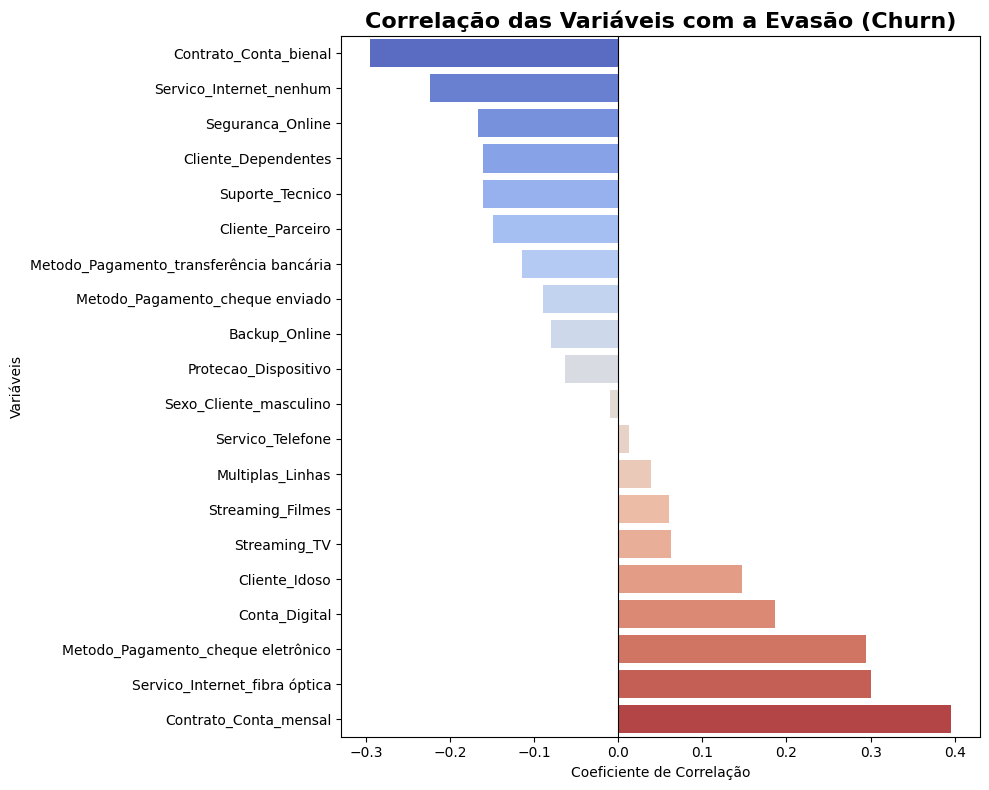

In [169]:
correlacoes_df = correlacoes.reset_index()
correlacoes_df.columns = ['Variavel', 'Correlacao']

plt.figure(figsize=(10, 8))
sns.barplot(
    data=correlacoes_df,
    x='Correlacao',
    y='Variavel',
    hue='Variavel',
    dodge=False,
    palette='coolwarm',
    legend=False
)

plt.title('Correlação das Variáveis com a Evasão (Churn)', fontsize=16, weight='bold')
plt.xlabel('Coeficiente de Correlação')
plt.ylabel('Variáveis')
plt.axvline(0, color='black', linewidth=0.8)
plt.tight_layout()
plt.show()

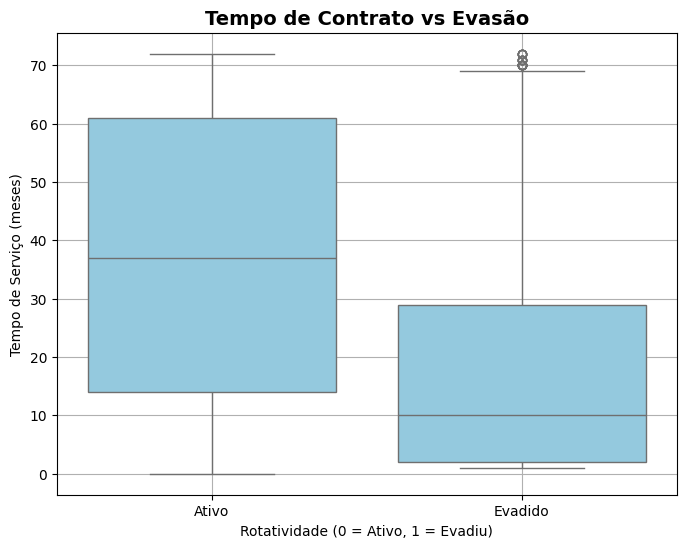

In [170]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Rotatividade', y='Tempo_Servico', data=df, color='skyblue')
plt.title('Tempo de Contrato vs Evasão', fontsize=14, weight='bold')
plt.xlabel('Rotatividade (0 = Ativo, 1 = Evadiu)')
plt.ylabel('Tempo de Serviço (meses)')
plt.xticks([0,1], ['Ativo', 'Evadido'])
plt.grid(True)
plt.show()


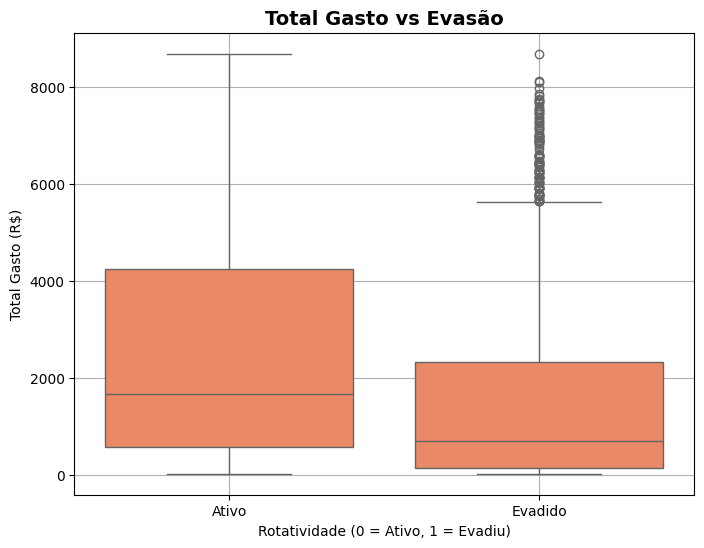

In [171]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Rotatividade', y='Encargos_Totais', data=df, color='coral')
plt.title('Total Gasto vs Evasão', fontsize=14, weight='bold')
plt.xlabel('Rotatividade (0 = Ativo, 1 = Evadiu)')
plt.ylabel('Total Gasto (R$)')
plt.xticks([0,1], ['Ativo', 'Evadido'])
plt.grid(True)
plt.show()


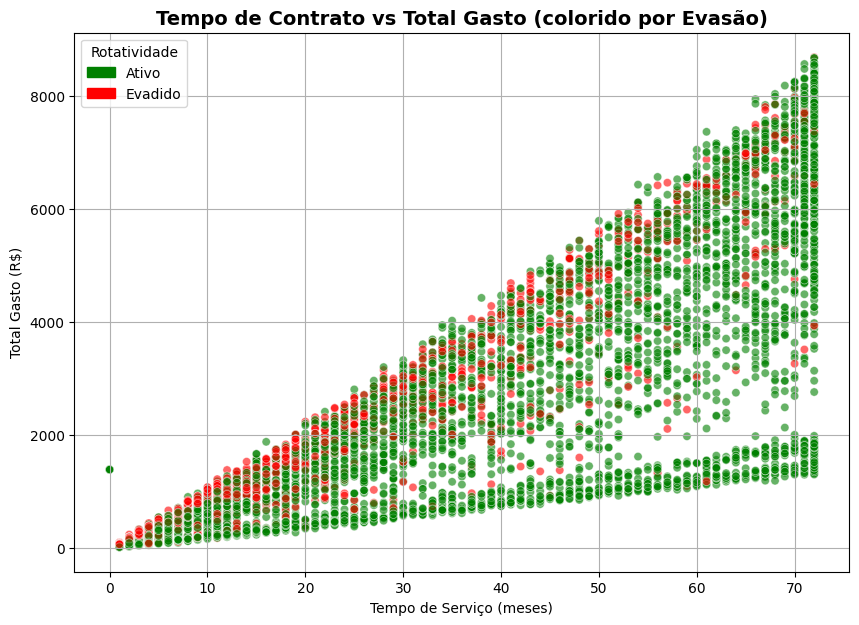

In [172]:
import matplotlib.patches as mpatches

plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df,
    x='Tempo_Servico',
    y='Encargos_Totais',
    hue='Rotatividade',
    palette={0: 'green', 1: 'red'},
    alpha=0.6
)

ativo_patch = mpatches.Patch(color='green', label='Ativo')
evadido_patch = mpatches.Patch(color='red', label='Evadido')

plt.legend(handles=[ativo_patch, evadido_patch], title='Rotatividade')
plt.title('Tempo de Contrato vs Total Gasto (colorido por Evasão)', fontsize=14, weight='bold')
plt.xlabel('Tempo de Serviço (meses)')
plt.ylabel('Total Gasto (R$)')
plt.grid(True)
plt.show()


**Separação de Dados**

In [173]:
from sklearn.model_selection import train_test_split

X = df.drop('Rotatividade', axis=1)
y = df['Rotatividade']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Tamanho treino: {X_train.shape[0]} amostras")
print(f"Tamanho teste: {X_test.shape[0]} amostras")


Tamanho treino: 5086 amostras
Tamanho teste: 2181 amostras


**Criação de Modelos**

**Modelo 1: Regressão Logística (precisa de normalização)**

Por quê?
Reg. Logística é um modelo linear que funciona melhor com variáveis na mesma escala. Se os dados tiverem valores em escalas muito diferentes (ex: tempo em meses, gastos em reais), ele pode ficar “viciado” em variáveis de maior magnitude.

Então:
Fazemos a normalização (padronização com StandardScaler) para deixar tudo na mesma régua (média 0, desvio 1).


In [174]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Pipeline com normalização + regressão logística
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=42))
])

# Treina
pipe_lr.fit(X_train, y_train)

# Previsão
y_pred_lr = pipe_lr.predict(X_test)

# Avaliação
print("Relatório Regressão Logística:\n")
print(classification_report(y_test, y_pred_lr))


Relatório Regressão Logística:

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1620
           1       0.64      0.54      0.58       561

    accuracy                           0.80      2181
   macro avg       0.74      0.72      0.73      2181
weighted avg       0.79      0.80      0.80      2181



**Modelo 2: Random Forest (não precisa de normalização)**

Por quê?
Árvores de decisão e ensembles como Random Forest são baseados em regras de divisão dos dados, não em distâncias ou gradientes sensíveis a escala.
Ou seja, não importa se uma variável varia entre 0 e 1 milhão, o modelo vai analisar cortes e separações independentemente da escala.



In [175]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Modelo direto, sem normalização
rf = RandomForestClassifier(random_state=42)

# Treina
rf.fit(X_train, y_train)

# Previsão
y_pred_rf = rf.predict(X_test)

# Avaliação
print("Relatório Random Forest:\n")
print(classification_report(y_test, y_pred_rf))


Relatório Random Forest:

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1620
           1       0.61      0.48      0.53       561

    accuracy                           0.79      2181
   macro avg       0.72      0.69      0.70      2181
weighted avg       0.77      0.79      0.78      2181



In [176]:
from imblearn.over_sampling import SMOTE

# Cria o objeto SMOTE
smote = SMOTE(random_state=42)

# Aplica SMOTE só no treino
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Checar o balanceamento pós-SMOTE
print("Antes:", y_train.value_counts())
print("Depois:", y_train_smote.value_counts())


Antes: Rotatividade
0    3778
1    1308
Name: count, dtype: int64
Depois: Rotatividade
0    3778
1    3778
Name: count, dtype: int64


In [177]:
# Exemplo com Regressão Logística

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

pipe_lr_smote = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=42))
])

pipe_lr_smote.fit(X_train_smote, y_train_smote)

y_pred_smote = pipe_lr_smote.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_smote))


              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1620
           1       0.54      0.64      0.58       561

    accuracy                           0.77      2181
   macro avg       0.70      0.72      0.71      2181
weighted avg       0.78      0.77      0.77      2181



In [178]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# 1. Aplica SMOTE só no treino
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Distribuição original do treino:")
print(y_train.value_counts())
print("\nDistribuição após SMOTE:")
print(y_train_smote.value_counts())

# 2. Treina Random Forest com os dados balanceados
rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(X_train_smote, y_train_smote)

# 3. Faz a previsão no conjunto de teste (sem SMOTE)
y_pred_rf_smote = rf_smote.predict(X_test)

# 4. Avalia o modelo
print("Relatório Random Forest com SMOTE:\n")
print(classification_report(y_test, y_pred_rf_smote))


Distribuição original do treino:
Rotatividade
0    3778
1    1308
Name: count, dtype: int64

Distribuição após SMOTE:
Rotatividade
0    3778
1    3778
Name: count, dtype: int64
Relatório Random Forest com SMOTE:

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1620
           1       0.53      0.58      0.56       561

    accuracy                           0.76      2181
   macro avg       0.69      0.70      0.70      2181
weighted avg       0.77      0.76      0.76      2181



**Avaliação dos Modelos**

=== Avaliação do modelo: Regressão Logística com SMOTE ===
Acurácia: 0.7662
Precisão: 0.5382
Recall: 0.6399
F1-score: 0.5847
Matriz de Confusão:
[[1312  308]
 [ 202  359]]


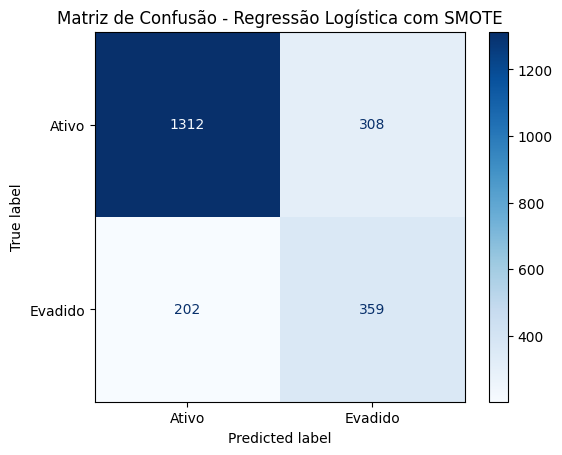

=== Avaliação do modelo: Random Forest com SMOTE ===
Acurácia: 0.7616
Precisão: 0.5337
Recall: 0.5793
F1-score: 0.5556
Matriz de Confusão:
[[1336  284]
 [ 236  325]]


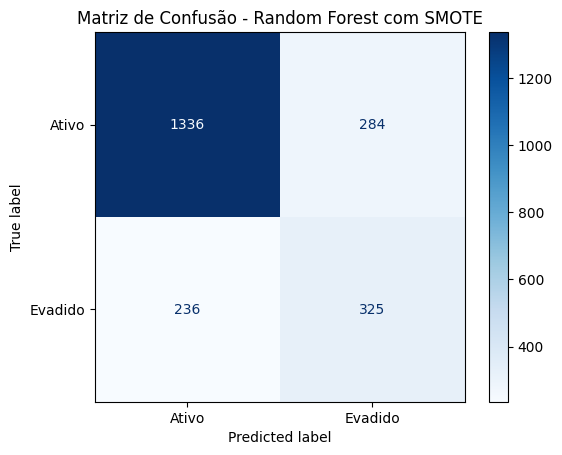

In [179]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def avaliar_modelo(modelo, X_teste, y_teste, nome_modelo):
    y_pred = modelo.predict(X_teste)

    acc = accuracy_score(y_teste, y_pred)
    prec = precision_score(y_teste, y_pred)
    rec = recall_score(y_teste, y_pred)
    f1 = f1_score(y_teste, y_pred)
    cm = confusion_matrix(y_teste, y_pred)

    print(f"=== Avaliação do modelo: {nome_modelo} ===")
    print(f"Acurácia: {acc:.4f}")
    print(f"Precisão: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("Matriz de Confusão:")
    print(cm)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ativo', 'Evadido'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Matriz de Confusão - {nome_modelo}')
    plt.show()

# Avaliar Regressão Logística (com SMOTE, pipeline)
avaliar_modelo(pipe_lr_smote, X_test, y_test, "Regressão Logística com SMOTE")

# Avaliar Random Forest (com SMOTE)
avaliar_modelo(rf_smote, X_test, y_test, "Random Forest com SMOTE")


**Ajustar hiperparâmetros (Grid Search)**

In [180]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Pipeline com scaler e regressão
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=42, max_iter=1000))
])

# Grade de parâmetros para testar
param_grid_lr = {
    'logreg__C': [0.01, 0.1, 1, 10],          # força da regularização
    'logreg__penalty': ['l2'],                 # tipo de regularização
    'logreg__solver': ['lbfgs']                # otimizador
}

grid_search_lr = GridSearchCV(pipe_lr, param_grid_lr, cv=5, scoring='f1', n_jobs=-1)
grid_search_lr.fit(X_train_smote, y_train_smote)

print("Melhores parâmetros Regressão Logística:", grid_search_lr.best_params_)
print("Melhor F1-score Regressão Logística:", grid_search_lr.best_score_)

# Modelo ajustado com os melhores parâmetros
best_lr = grid_search_lr.best_estimator_
best_lr.fit(X_train_smote, y_train_smote)


Melhores parâmetros Regressão Logística: {'logreg__C': 0.1, 'logreg__penalty': 'l2', 'logreg__solver': 'lbfgs'}
Melhor F1-score Regressão Logística: 0.797999361574184


Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg',
                 LogisticRegression(C=0.1, max_iter=1000, random_state=42))])

In [181]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1', n_jobs=-1)
grid_search_rf.fit(X_train_smote, y_train_smote)

print("Melhores parâmetros Random Forest:", grid_search_rf.best_params_)
print("Melhor F1-score Random Forest:", grid_search_rf.best_score_)

# Modelo ajustado com os melhores parâmetros
best_rf = grid_search_rf.best_estimator_
best_rf.fit(X_train_smote, y_train_smote)


Melhores parâmetros Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Melhor F1-score Random Forest: 0.8281306868199877


RandomForestClassifier(min_samples_leaf=2, random_state=42)

=== Avaliação do modelo: Regressão Logística Ajustada com SMOTE ===
Acurácia: 0.7611
Precisão: 0.5287
Recall: 0.6578
F1-score: 0.5862
Matriz de Confusão:
[[1291  329]
 [ 192  369]]


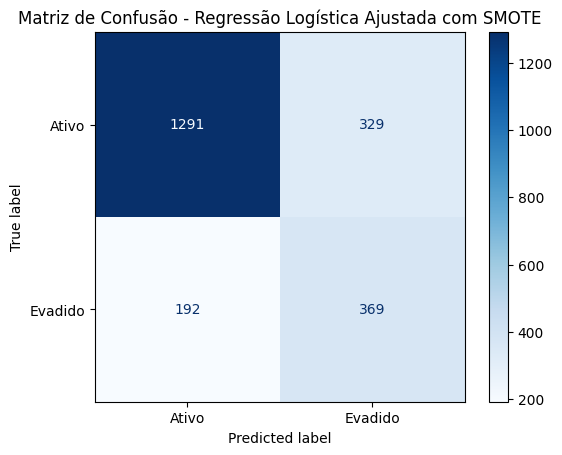

=== Avaliação do modelo: Random Forest Ajustada com SMOTE ===
Acurácia: 0.7652
Precisão: 0.5375
Recall: 0.6257
F1-score: 0.5783
Matriz de Confusão:
[[1318  302]
 [ 210  351]]


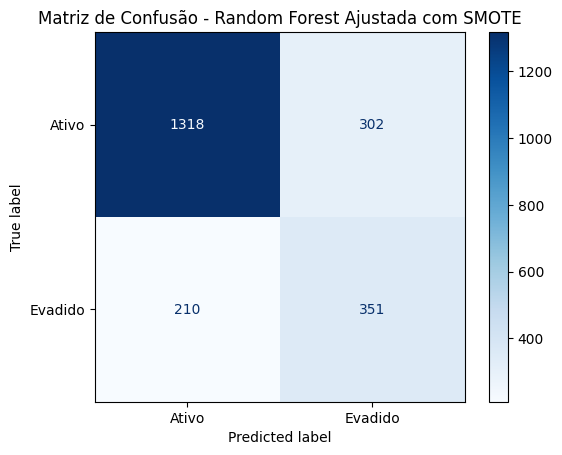

In [182]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def avaliar_modelo(modelo, X_teste, y_teste, nome_modelo):
    y_pred = modelo.predict(X_teste)

    acc = accuracy_score(y_teste, y_pred)
    prec = precision_score(y_teste, y_pred)
    rec = recall_score(y_teste, y_pred)
    f1 = f1_score(y_teste, y_pred)
    cm = confusion_matrix(y_teste, y_pred)

    print(f"=== Avaliação do modelo: {nome_modelo} ===")
    print(f"Acurácia: {acc:.4f}")
    print(f"Precisão: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("Matriz de Confusão:")
    print(cm)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ativo', 'Evadido'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Matriz de Confusão - {nome_modelo}')
    plt.show()

# Avalia os modelos ajustados
avaliar_modelo(best_lr, X_test, y_test, "Regressão Logística Ajustada com SMOTE")
avaliar_modelo(best_rf, X_test, y_test, "Random Forest Ajustada com SMOTE")


**Análise de Importância das Variáveis**

Regressão Logística:

In [183]:
# Pega o modelo dentro do pipeline
model = best_lr.named_steps['logreg']

# Pega os nomes das features (colunas) — lembrando que o scaler não muda nomes
features = X_train.columns

# Coeficientes
coef = model.coef_[0]

# Cria dataframe com nome e coeficiente, ordenado
coef_df = pd.DataFrame({
    'Variável': features,
    'Coeficiente': coef
}).sort_values(by='Coeficiente', ascending=False)

print(coef_df)


                                   Variável  Coeficiente
13                         Encargos_Mensais     2.992537
14                          Encargos_Totais     1.183499
18                  Servico_Internet_nenhum     0.635373
15                           Contas_Diarias     0.165391
20                    Contrato_Conta_mensal     0.127137
12                            Conta_Digital     0.025726
0                             Cliente_Idoso    -0.092755
1                          Cliente_Parceiro    -0.129657
16                   Sexo_Cliente_masculino    -0.175931
2                       Cliente_Dependentes    -0.249598
21       Metodo_Pagamento_cheque eletrônico    -0.252979
5                          Multiplas_Linhas    -0.274341
8                      Protecao_Dispositivo    -0.395770
23  Metodo_Pagamento_transferência bancária    -0.404608
22          Metodo_Pagamento_cheque enviado    -0.404649
19                    Contrato_Conta_bienal    -0.409669
11                         Stre

Random Forest:

                                   Variável  Importância
3                             Tempo_Servico     0.131130
14                          Encargos_Totais     0.124968
13                         Encargos_Mensais     0.112102
19                    Contrato_Conta_bienal     0.068353
20                    Contrato_Conta_mensal     0.067916
9                           Suporte_Tecnico     0.056711
6                          Seguranca_Online     0.051523
2                       Cliente_Dependentes     0.041449
17            Servico_Internet_fibra óptica     0.041320
1                          Cliente_Parceiro     0.032720
18                  Servico_Internet_nenhum     0.030255
7                             Backup_Online     0.027954
23  Metodo_Pagamento_transferência bancária     0.027741
15                           Contas_Diarias     0.027116
22          Metodo_Pagamento_cheque enviado     0.026087
16                   Sexo_Cliente_masculino     0.024745
8                      Protecao

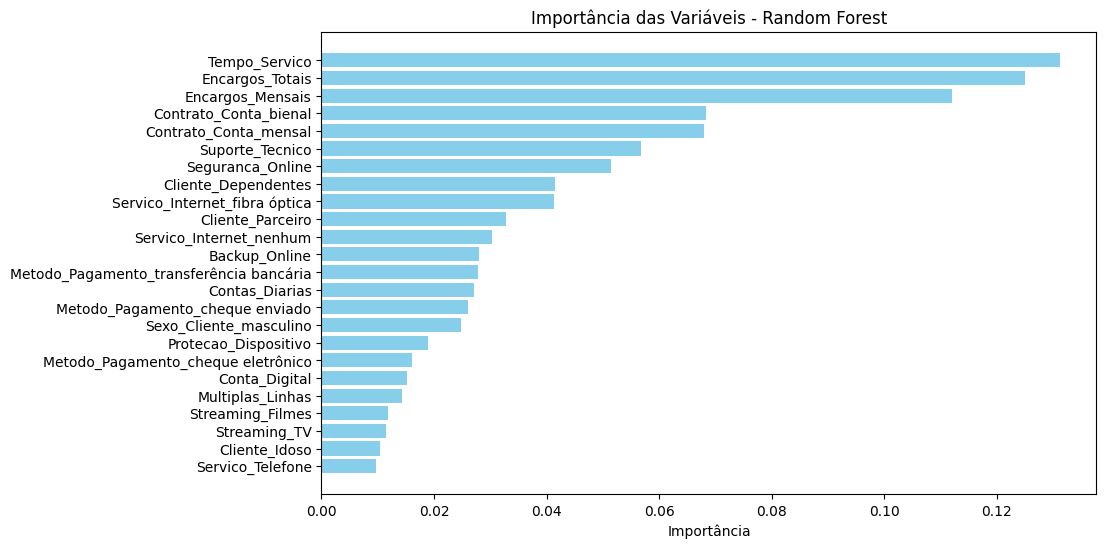

In [184]:
# Pega importância das features
importancia = best_rf.feature_importances_

# Nomes das features
features = X_train.columns

# Cria DataFrame ordenado
df_importancia = pd.DataFrame({
    'Variável': features,
    'Importância': importancia
}).sort_values(by='Importância', ascending=False)

print(df_importancia)

# Gráfico pra visualizar
plt.figure(figsize=(10,6))
plt.barh(df_importancia['Variável'], df_importancia['Importância'], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Importância das Variáveis - Random Forest')
plt.xlabel('Importância')
plt.show()


**Conclusão**

# 📊 Relatório Analítico sobre Evasão de Clientes

## 1. Introdução

Este relatório tem como objetivo identificar os principais fatores associados à evasão de clientes e propor estratégias concretas de retenção. Utilizando os modelos **Regressão Logística** e **Random Forest**, ambos ajustados com **SMOTE** para balanceamento das classes, exploramos as variáveis mais relevantes para a previsão de churn e seus impactos na decisão dos clientes.

---

## 2. Avaliação dos Modelos

Ambos os modelos foram avaliados com as métricas padrão de classificação:

| Modelo               | Acurácia | Precisão | Recall | F1-score |
|---------------------|----------|----------|--------|----------|
| Regressão Logística | 0.7611   | 0.5287   | 0.6578 | 0.5862   |
| Random Forest       | 0.7652   | 0.5375   | 0.6257 | 0.5783   |

**Análise:**  
- A **Regressão Logística** se destaca em **recall**, o que é essencial em problemas de churn, pois o foco é identificar corretamente os clientes que irão sair.
- A **Random Forest** oferece um pequeno ganho em acurácia geral, mas com menor sensibilidade.

---

## 3. Fatores que Influenciam a Evasão

### 3.1 Regressão Logística – Coeficientes

Os coeficientes da regressão indicam a influência de cada variável na probabilidade de churn.

**Variáveis com maior impacto positivo (aumentam chance de evasão):**
- `Encargos_Mensais` (**+2.99**)
- `Encargos_Totais` (**+1.18**)
- `Servico_Internet_nenhum` (**+0.63**)
- `Contas_Diarias` (**+0.16**)
- `Contrato_Conta_mensal` (**+0.12**)

**Variáveis com impacto negativo (reduzem a chance de evasão):**
- `Tempo_Servico` (**-1.62**)
- `Servico_Internet_fibra óptica` (**-0.99**)
- `Servico_Telefone`, `Suporte_Tecnico`, `Seguranca_Online` (valores entre -0.5 e -0.8)
- `Cliente_Dependentes`, `Cliente_Parceiro` (relacionamentos reduzem a evasão)

---

### 3.2 Random Forest – Importância das Variáveis

A importância das variáveis é baseada na redução de impureza das árvores de decisão.

**Variáveis mais importantes:**
1. `Tempo_Servico` – **13.1%**
2. `Encargos_Totais` – **12.4%**
3. `Encargos_Mensais` – **11.2%**
4. `Contrato_Conta_bienal` – **6.8%**
5. `Contrato_Conta_mensal` – **6.7%**
6. `Suporte_Tecnico`, `Seguranca_Online`, `Fibra Óptica` – totalizam **~15%**

---

## 4. Estratégias de Retenção

### 📉 1. Redução da Percepção de Custo
- Reestruturar planos com maior transparência.
- Oferecer descontos progressivos com base no tempo de fidelidade.
- Criar pacotes com serviços bônus (streaming, proteção digital).

### 🤝 2. Estímulo à Fidelização
- Oferecer bônus por renovação de contratos anuais/bienais.
- Programas de fidelidade e cashback para clientes antigos.

### 📡 3. Valorização da Qualidade do Serviço
- Investir em infraestrutura de **fibra óptica**.
- Fortalecer canais de **suporte técnico** e atendimento.
- Oferecer pacotes integrados de **streaming**, **segurança digital** e **backup**.

### 👨‍👩‍👧‍👦 4. Personalização para Clientes Familiares
- Pacotes para múltiplas linhas com descontos progressivos.
- Planos familiares com benefícios conjuntos.

### 💡 5. Acompanhamento Proativo de Novos Clientes
- Intervenções no primeiro mês com ofertas especiais e onboarding personalizado.
- Monitoramento via **NPS**, SAC e interações digitais.

---

## 5. Conclusão

A evasão de clientes é fortemente influenciada por fatores financeiros, percepção de qualidade e tipo de contrato. O cruzamento entre os modelos aponta para uma convergência clara: **clientes que pagam mais e recebem menos tendem a sair**. Já aqueles com contratos longos, bons serviços e apoio técnico permanecem.

> **"Entender por que os clientes vão embora é o primeiro passo para fazê-los ficar."**

---
